In [292]:
# Continuous or Boolean
# Loop through each predictor
    # Determine if the predictor is cat/cont
    # Automatically generate the necessary plot(s) to inspect it
    # Calculate the different ranking algos
    # p-value & t-score (continuous predictors only) along with it's plot

import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

In [293]:
#data = datasets.load_diabetes(as_frame=True)
#data = datasets.load_breast_cancer(as_frame=True)

In [294]:
#Diabetes
#diabetes = datasets.load_diabetes(as_frame=True)
#df = diabetes['frame']
#predictors = ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']
#response = ['target']

In [341]:
#Iris
iris = datasets.load_iris(as_frame=True)
df = iris['frame']       
predictors = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
response = ['target']

In [337]:
import sys
 
import statsmodels.api
from plotly import express as px
from sklearn import datasets
 
    



def lr(df):
    X = df.iloc[::-1]
    y = df.iloc[:-1]
    for idx, column in enumerate(X.T):
        feature_name = diabetes.feature_names[idx]
        predictor = statsmodels.api.add_constant(column)
        linear_regression_model = statsmodels.api.OLS(y, predictor)
        linear_regression_model_fitted = linear_regression_model.fit()
        print(f"Variable: {feature_name}")
        print(linear_regression_model_fitted.summary())
        # Get the stats
        t_value = round(linear_regression_model_fitted.tvalues[1], 6)
        p_value = "{:.6e}".format(linear_regression_model_fitted.pvalues[1])
 
        # Plot the figure
        fig = px.scatter(x=column, y=y, trendline="ols")
        fig.update_layout(
            title=f"Variable: {feature_name}: (t-value={t_value}) (p-value={p_value})",
            xaxis_title=f"Variable: {feature_name}",
            yaxis_title="y",
        )
        fig.show()
        
    return
 
    
if __name__ == "__main__":
    '''
    diabetes = datasets.load_diabetes(as_frame=True)
    df = diabetes['frame']
    predictors = ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']
    response = ['target']
    X = diabetes.data.values
    y = diabetes.target.values
    '''
    iris = datasets.load_iris(as_frame=True)
    df = iris['frame']       
    predictors = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
    response = ['target']
    variable_type(df,predictors,response)
    #lr(X,y)

Resposne Variable:
target : continuous response
sepal length (cm) : continuous predictor
sepal width (cm) : continuous predictor
petal length (cm) : continuous predictor
petal width (cm) : continuous predictor


In [301]:
#Randon Forest 

In [302]:
from sklearn.ensemble import RandomForestClassifier
diabetes = datasets.load_diabetes(as_frame=True)
df = diabetes['frame']
X = df.iloc[:, :-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [303]:
import time
import numpy as np
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")


Elapsed time to compute the importances: 0.027 seconds


In [304]:
importances

array([0.10691617, 0.02821124, 0.12569391, 0.11593756, 0.11176841,
       0.11255997, 0.10779871, 0.05934122, 0.11808188, 0.11369093])

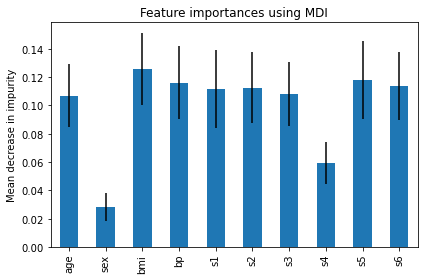

In [305]:
forest_importances_impurity = pd.Series(importances, index=df.columns[0:10])

fig, ax = plt.subplots()
forest_importances_impurity.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [306]:
forest_importances_impurity

age    0.106916
sex    0.028211
bmi    0.125694
bp     0.115938
s1     0.111768
s2     0.112560
s3     0.107799
s4     0.059341
s5     0.118082
s6     0.113691
dtype: float64

In [307]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances_permutation = pd.Series(result.importances_mean, index=df.columns[0:10])

Elapsed time to compute the importances: 5.226 seconds


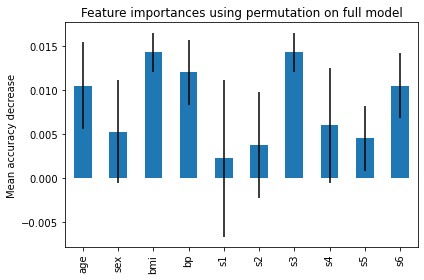

In [308]:
fig, ax = plt.subplots()
forest_importances_permutation.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [326]:
forest_importances_permutation.to_frame().rename(columns = {0:'Feature Importance'}).sort_values('Feature Importance',ascending=False)

,Feature Importance
bmi,0.014286
s3,0.014286
bp,0.012030
age,0.010526
s6,0.010526
s4,0.006015
sex,0.005263
s5,0.004511
s2,0.003759
s1,0.002256


In [344]:
def check_response(df,response):
    #print('Resposne Variable:')
    if df[response].dtypes[0]== 'O':
        return('CAT_RES')
    else:
        return('CONT_RES')
        
def check_predictor(df,i,predictors):
    if df[predictors].dtypes[i] == 'O':
        return('CAT_PRED')
    else:
        return('CONT_PRED')


def cont_response_cont_predictor(df,i):
    x = df[df.columns[i]]
    #print(x.values)
    y = df[df.columns[-1]]

    fig = px.scatter(x=x, y=y, trendline="ols")
    fig.update_layout(
        title="Continuous Response by Continuous Predictor",
        xaxis_title=df.columns[i],
        yaxis_title="Response",
    )
    fig.show()
    return
    
def cat_resp_cont_predictor():
    n = 200

    # Add histogram data
    x1 = numpy.random.randn(n) - 2
    x3 = numpy.random.randn(n) + 2

    # Group data together
    hist_data = [x1, x3]

    group_labels = ["Response = 0", "Response = 1"]

    # Create distribution plot with custom bin_size
    fig_1 = ff.create_distplot(hist_data, group_labels, bin_size=0.2)
    fig_1.update_layout(
        title="Continuous Predictor by Categorical Response",
        xaxis_title="Predictor",
        yaxis_title="Distribution",
    )
    fig_1.show()
    fig_2 = go.Figure()
    for curr_hist, curr_group in zip(hist_data, group_labels):
        fig_2.add_trace(
            go.Violin(
                x=numpy.repeat(curr_group, n),
                y=curr_hist,
                name=curr_group,
                box_visible=True,
                meanline_visible=True,
            )
        )
    fig_2.update_layout(
        title="Continuous Predictor by Categorical Response",
        xaxis_title="Response",
        yaxis_title="Predictor",
    )
    fig_2.show()
    return


In [345]:
result_response = check_response(df,response)
for i in range(0,len(df.columns)-1):
    #result_response = check_response(df,i,response)
    result_predictor = check_predictor(df,i,predictors)
    if result_response == "CAT_RES":
        if result_predictor == "CAT_PRED":
            print('cat_res_cat_pred()')
        else:
            cat_resp_cont_predictor()
    else:
        if result_predictor == "CAT_PRED":
            print('cont_res_cat_pred()')
        else:
            cont_response_cont_predictor(df,i)
        

In [ ]:
pred =[]
response_avg =[]
pred_value_count =[]
for i in range(0,len(df.columns)):
    X = df[[df.columns[i],df.columns[-1]]]
    print(i)
    print(X.target.mean())
    print('end')
    

[24. 23. 47. 53. 55. 85. 69. 47. 33.  6.]
[-0.04464164 -0.03510946 -0.02557729 -0.01604511 -0.00651293  0.00301924
  0.01255142  0.02208359  0.03161577  0.04114794  0.05068012]


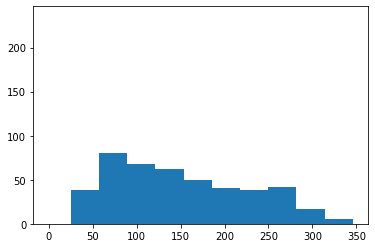

In [300]:
#x = plt.hist(df['age'])
freq =[]
bins=[]
for i in range(0,len(df.columns)):
    x = plt.hist(df[df.columns[i]])
    freq.append(x[0])
    bins.append(x[1])
    
    
print(freq[0])
print(bins[1])

In [156]:
frequency = x[0]
bins = x[1]

array([-0.10722563, -0.0854304 , -0.06363517, -0.04183994, -0.02004471,
        0.00175052,  0.02354575,  0.04534098,  0.06713621,  0.08893144,
        0.11072668])

(array([24., 23., 47., 53., 55., 85., 69., 47., 33.,  6.]),
 array([-0.10722563, -0.0854304 , -0.06363517, -0.04183994, -0.02004471,
         0.00175052,  0.02354575,  0.04534098,  0.06713621,  0.08893144,
         0.11072668]),
 <BarContainer object of 10 artists>)

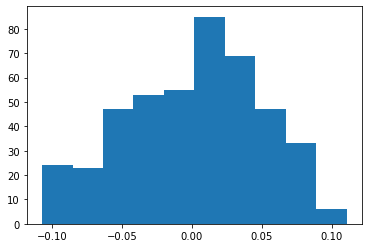

In [197]:
plt.hist(df['age'])